In [0]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

(X_train,y_train),(X_test,y_test)=mnist.load_data()
print('X_train shape: ',X_train.shape)
print('Y_train shape: ',y_train.shape)
print('-'*50)
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

X_train shape:  (60000, 28, 28)
Y_train shape:  (60000,)
--------------------------------------------------
X_test shape:  (10000, 28, 28)
y_test shape:  (10000,)


In [0]:
# input image dimensions
img_rows, img_cols = 28, 28
if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [0]:
#Some initialization
batch_size = 128
num_classes = 10
epochs = 12
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# CNN WITH 3 LAYERS CONSIDERING RELU AS A ACTIVATION FUNCTION

###  USING BN+DROPOUT

In [0]:
from keras.layers.normalization import BatchNormalization
#Conv2d-->Pooling-->Conv2d-->Pooling-->Conv2d-->BN-->Pooling-->FC-->Dropout-->Softmax
#We will use Relu as Activation function and Adam as Optimizer
#We will also use BatchNormalization and Dropout at suitable places

model=Sequential()
#Adding first layer
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))


#Second layer
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


#third layer
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization(axis=1))
model.add(MaxPooling2D(pool_size=(2,2)))


#Fully Connected layer
#Flattening
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

#Softmax
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
batch_normalization_4 (Batch (None, 3, 3, 64)          12        
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 1, 1, 64)         

In [0]:
#Compiling with Cross-entropy-loss and Adam Optimizer taking Accuracy as a metric
from keras.optimizers import Adam
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
history=model.fit(X_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 5s 77us/step - loss: 0.2481 - acc: 0.9224 - val_loss: 0.0739 - val_acc: 0.9775
Epoch 2/12
60000/60000 [==============================] - 3s 56us/step - loss: 0.0740 - acc: 0.9768 - val_loss: 0.0527 - val_acc: 0.9833
Epoch 3/12
60000/60000 [==============================] - 3s 56us/step - loss: 0.0519 - acc: 0.9836 - val_loss: 0.0571 - val_acc: 0.9843
Epoch 4/12
60000/60000 [==============================] - 3s 56us/step - loss: 0.0409 - acc: 0.9866 - val_loss: 0.0571 - val_acc: 0.9830
Epoch 5/12
60000/60000 [==============================] - 3s 56us/step - loss: 0.0331 - acc: 0.9896 - val_loss: 0.0468 - val_acc: 0.9872
Epoch 6/12
60000/60000 [==============================] - 3s 57us/step - loss: 0.0305 - acc: 0.9901 - val_loss: 0.0459 - val_acc: 0.9868
Epoch 7/12
60000/60000 [==============================] - 3s 55us/step - loss: 0.0244 - acc: 0.9922 - val_loss: 0.0521 - val_acc

In [0]:
import matplotlib.pyplot as plt
import numpy as np

def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

Test score: 0.06679211560489139
Test accuracy: 0.986


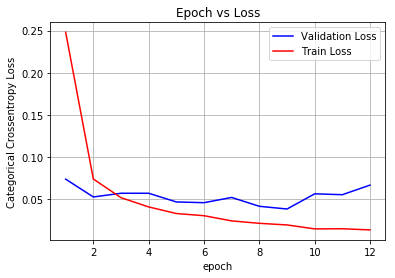

In [0]:
score = model.evaluate(X_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_title('Epoch vs Loss')
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)






### WITHOUT BN

In [0]:
#Conv2d-->Pooling-->Conv2d-->Pooling-->Conv2d---->Pooling-->FC-->Dropout-->Softmax
#We will use Relu as Activation function and Adam as Optimizer

model=Sequential()
#Adding first layer
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))


#Second layer
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


#third layer
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


#Fully Connected layer
#Flattening
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

#Softmax
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 64)               

In [0]:
#Compiling with Cross-entropy-loss and Adam Optimizer taking Accuracy as a metric
from keras.optimizers import Adam
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
history=model.fit(X_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 4s 71us/step - loss: 0.3654 - acc: 0.8838 - val_loss: 0.1055 - val_acc: 0.9682
Epoch 2/12
60000/60000 [==============================] - 3s 51us/step - loss: 0.1023 - acc: 0.9691 - val_loss: 0.0695 - val_acc: 0.9804
Epoch 3/12
60000/60000 [==============================] - 3s 51us/step - loss: 0.0728 - acc: 0.9786 - val_loss: 0.0539 - val_acc: 0.9841
Epoch 4/12
60000/60000 [==============================] - 3s 56us/step - loss: 0.0581 - acc: 0.9823 - val_loss: 0.0513 - val_acc: 0.9842
Epoch 5/12
60000/60000 [==============================] - 3s 54us/step - loss: 0.0471 - acc: 0.9852 - val_loss: 0.0430 - val_acc: 0.9871
Epoch 6/12
60000/60000 [==============================] - 3s 52us/step - loss: 0.0409 - acc: 0.9869 - val_loss: 0.0480 - val_acc: 0.9865
Epoch 7/12
60000/60000 [==============================] - 3s 52us/step - loss: 0.0370 - acc: 0.9886 - val_loss: 0.0459 - val_acc

In [0]:
import matplotlib.pyplot as plt
import numpy as np

def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

Test score: 0.05752517269679956
Test accuracy: 0.9847


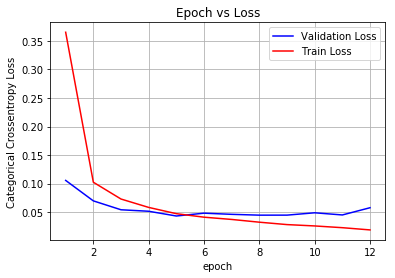

In [0]:
score = model.evaluate(X_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_title('Epoch vs Loss')
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)





### WITHOUT DROPOUT 

In [0]:
from keras.layers.normalization import BatchNormalization
#Conv2d-->Pooling-->Conv2d-->Pooling-->Conv2d-->BN-->Pooling-->FC--->Softmax
#We will use Relu as Activation function and Adam as Optimizer
#We will also use BatchNormalization and Dropout at suitable places

model=Sequential()
#Adding first layer
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))


#Second layer
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


#third layer
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization(axis=1))
model.add(MaxPooling2D(pool_size=(2,2)))


#Fully Connected layer
#Flattening
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))

#Softmax
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
batch_normalization_5 (Batch (None, 3, 3, 64)          12        
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 1, 1, 64)         

In [0]:
#Compiling with Cross-entropy-loss and Adam Optimizer taking Accuracy as a metric
from keras.optimizers import Adam
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
history=model.fit(X_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 5s 80us/step - loss: 0.1998 - acc: 0.9387 - val_loss: 0.0811 - val_acc: 0.9746
Epoch 2/12
60000/60000 [==============================] - 3s 55us/step - loss: 0.0646 - acc: 0.9798 - val_loss: 0.0665 - val_acc: 0.9787
Epoch 3/12
60000/60000 [==============================] - 3s 55us/step - loss: 0.0457 - acc: 0.9857 - val_loss: 0.0521 - val_acc: 0.9850
Epoch 4/12
60000/60000 [==============================] - 3s 55us/step - loss: 0.0348 - acc: 0.9890 - val_loss: 0.0514 - val_acc: 0.9851
Epoch 5/12
60000/60000 [==============================] - 3s 55us/step - loss: 0.0272 - acc: 0.9909 - val_loss: 0.0525 - val_acc: 0.9845
Epoch 6/12
60000/60000 [==============================] - 3s 55us/step - loss: 0.0234 - acc: 0.9923 - val_loss: 0.0541 - val_acc: 0.9857
Epoch 7/12
60000/60000 [==============================] - 3s 57us/step - loss: 0.0189 - acc: 0.9940 - val_loss: 0.0494 - val_acc

In [0]:
import matplotlib.pyplot as plt
import numpy as np

def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()
    
    

Test score: 0.06143429972460553
Test accuracy: 0.9848


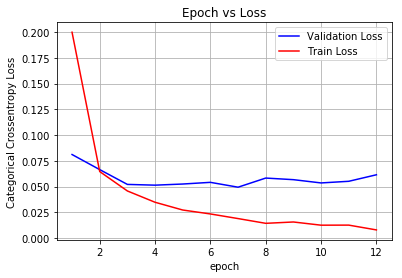

In [0]:
score = model.evaluate(X_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_title('Epoch vs Loss')
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)




# CNN WITH 3 LAYERS CONSIDERING SIGMOID AS A ACTIVATION FUNCTION

### USING BN + DROPOUT

In [0]:
from keras.layers.normalization import BatchNormalization
#Conv2d-->Pooling-->Conv2d-->Pooling-->Conv2d-->BN-->Pooling-->FC-->Dropout-->Softmax
#We will use sigmoid as Activation function and Adam as Optimizer
#We will also use BatchNormalization and Dropout at suitable places

model=Sequential()
#Adding first layer
model.add(Conv2D(32, kernel_size=(3, 3),activation='sigmoid',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))


#Second layer
model.add(Conv2D(64, kernel_size=(3, 3), activation='sigmoid'))
model.add(MaxPooling2D(pool_size=(2,2)))


#third layer
model.add(Conv2D(64, kernel_size=(3, 3), activation='sigmoid'))
model.add(BatchNormalization(axis=1))
model.add(MaxPooling2D(pool_size=(2,2)))


#Fully Connected layer
#Flattening
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('sigmoid'))
model.add(Dropout(0.5))

#Softmax
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
batch_normalization_6 (Batch (None, 3, 3, 64)          12        
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 1, 1, 64)        

In [0]:
#Compiling with Cross-entropy-loss and Adam Optimizer taking Accuracy as a metric
from keras.optimizers import Adam
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
history=model.fit(X_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 5s 79us/step - loss: 1.8599 - acc: 0.3115 - val_loss: 0.5820 - val_acc: 0.8273
Epoch 2/12
60000/60000 [==============================] - 3s 55us/step - loss: 0.2218 - acc: 0.9327 - val_loss: 0.1321 - val_acc: 0.9566
Epoch 3/12
60000/60000 [==============================] - 3s 55us/step - loss: 0.1352 - acc: 0.9585 - val_loss: 0.0884 - val_acc: 0.9733
Epoch 4/12
60000/60000 [==============================] - 3s 56us/step - loss: 0.1052 - acc: 0.9678 - val_loss: 0.0868 - val_acc: 0.9735
Epoch 5/12
60000/60000 [==============================] - 3s 55us/step - loss: 0.0871 - acc: 0.9729 - val_loss: 0.0884 - val_acc: 0.9718
Epoch 6/12
60000/60000 [==============================] - 3s 55us/step - loss: 0.0768 - acc: 0.9762 - val_loss: 0.0776 - val_acc: 0.9758
Epoch 7/12
60000/60000 [==============================] - 3s 56us/step - loss: 0.0662 - acc: 0.9795 - val_loss: 0.0688 - val_acc

In [0]:
import matplotlib.pyplot as plt
import numpy as np

def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

Test score: 0.051126524720713495
Test accuracy: 0.9853


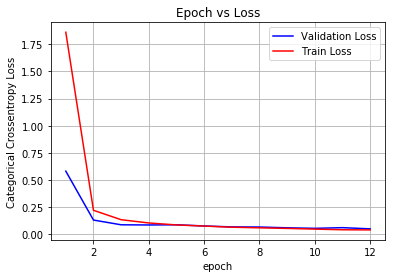

In [0]:
score = model.evaluate(X_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_title('Epoch vs Loss')
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)






### WITHOUT BN

In [0]:
#Conv2d-->Pooling-->Conv2d-->Pooling-->Conv2d---->Pooling-->FC-->Dropout-->Softmax
#We will use Relu as Activation function and Adam as Optimizer

model=Sequential()
#Adding first layer
model.add(Conv2D(32, kernel_size=(3, 3),activation='sigmoid',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))


#Second layer
model.add(Conv2D(64, kernel_size=(3, 3), activation='sigmoid'))
model.add(MaxPooling2D(pool_size=(2,2)))


#third layer
model.add(Conv2D(64, kernel_size=(3, 3), activation='sigmoid'))
model.add(MaxPooling2D(pool_size=(2,2)))


#Fully Connected layer
#Flattening
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('sigmoid'))
model.add(Dropout(0.5))

#Softmax
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 64)              

In [0]:
#Compiling with Cross-entropy-loss and Adam Optimizer taking Accuracy as a metric
from keras.optimizers import Adam
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
history=model.fit(X_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 4s 74us/step - loss: 2.3540 - acc: 0.1027 - val_loss: 2.3046 - val_acc: 0.0974
Epoch 2/12
60000/60000 [==============================] - 3s 51us/step - loss: 2.3052 - acc: 0.1054 - val_loss: 2.3026 - val_acc: 0.0974
Epoch 3/12
60000/60000 [==============================] - 3s 51us/step - loss: 2.3036 - acc: 0.1066 - val_loss: 2.3024 - val_acc: 0.1135
Epoch 4/12
60000/60000 [==============================] - 3s 52us/step - loss: 2.3024 - acc: 0.1089 - val_loss: 2.3013 - val_acc: 0.1135
Epoch 5/12
60000/60000 [==============================] - 3s 51us/step - loss: 2.1929 - acc: 0.1583 - val_loss: 1.2194 - val_acc: 0.6413
Epoch 6/12
60000/60000 [==============================] - 3s 52us/step - loss: 0.4917 - acc: 0.8502 - val_loss: 0.2106 - val_acc: 0.9333
Epoch 7/12
60000/60000 [==============================] - 3s 52us/step - loss: 0.2133 - acc: 0.9356 - val_loss: 0.1463 - val_acc

In [0]:
import matplotlib.pyplot as plt
import numpy as np

def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

Test score: 0.07533405585018918
Test accuracy: 0.9779


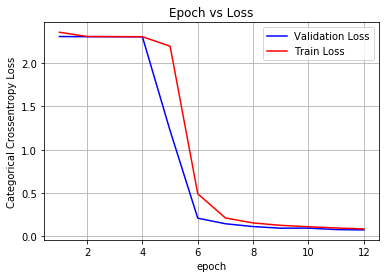

In [0]:
score = model.evaluate(X_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_title('Epoch vs Loss')
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

### WITHOUT DROPOUT

In [0]:
from keras.layers.normalization import BatchNormalization
#Conv2d-->Pooling-->Conv2d-->Pooling-->Conv2d-->BN-->Pooling-->FC---->Softmax
#We will use sigmoid as Activation function and Adam as Optimizer
#We will also use BatchNormalization and Dropout at suitable places

model=Sequential()
#Adding first layer
model.add(Conv2D(32, kernel_size=(3, 3),activation='sigmoid',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))


#Second layer
model.add(Conv2D(64, kernel_size=(3, 3), activation='sigmoid'))
model.add(MaxPooling2D(pool_size=(2,2)))


#third layer
model.add(Conv2D(64, kernel_size=(3, 3), activation='sigmoid'))
model.add(BatchNormalization(axis=1))
model.add(MaxPooling2D(pool_size=(2,2)))


#Fully Connected layer
#Flattening
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('sigmoid'))

#Softmax
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
batch_normalization_7 (Batch (None, 3, 3, 64)          12        
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 1, 1, 64)        

In [0]:
#Compiling with Cross-entropy-loss and Adam Optimizer taking Accuracy as a metric
from keras.optimizers import Adam
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
history=model.fit(X_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 5s 83us/step - loss: 1.4658 - acc: 0.4630 - val_loss: 0.3256 - val_acc: 0.9233
Epoch 2/12
60000/60000 [==============================] - 3s 55us/step - loss: 0.1915 - acc: 0.9427 - val_loss: 0.1524 - val_acc: 0.9523
Epoch 3/12
60000/60000 [==============================] - 3s 55us/step - loss: 0.1274 - acc: 0.9606 - val_loss: 0.1009 - val_acc: 0.9699
Epoch 4/12
60000/60000 [==============================] - 3s 54us/step - loss: 0.1000 - acc: 0.9694 - val_loss: 0.0800 - val_acc: 0.9762
Epoch 5/12
60000/60000 [==============================] - 3s 55us/step - loss: 0.0825 - acc: 0.9748 - val_loss: 0.0878 - val_acc: 0.9740
Epoch 6/12
60000/60000 [==============================] - 3s 55us/step - loss: 0.0738 - acc: 0.9770 - val_loss: 0.0650 - val_acc: 0.9799
Epoch 7/12
60000/60000 [==============================] - 3s 55us/step - loss: 0.0659 - acc: 0.9801 - val_loss: 0.0957 - val_acc

In [0]:
import matplotlib.pyplot as plt
import numpy as np

def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

Test score: 0.07715547566683963
Test accuracy: 0.9788


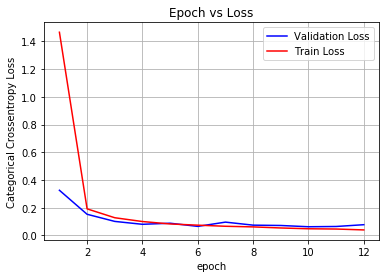

In [0]:
score = model.evaluate(X_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_title('Epoch vs Loss')
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

### CNN WITH 5 LAYERS AS RELU ACTIVATION FUNCTION

### USING BN+DROPOUT

In [0]:
model=Sequential()
#Adding first layer
model.add(Conv2D(64, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(1, 1)))

#Second layer
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(Dropout(0.20))
model.add(MaxPooling2D(pool_size=(2,2)))

#third layer
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization(axis=1))
model.add(MaxPooling2D(pool_size=(1,1)))

#Fourth Layer
model.add(Conv2D(32,kernel_size=(2,2),activation='relu'))
model.add(BatchNormalization(axis=1))
model.add(MaxPooling2D(pool_size=(2,2)))

#Fifth Layer
model.add(Conv2D(16,kernel_size=(2,2),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.20))


#Fully Connected layer
#Flattening
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

#Softmax
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 26, 26, 64)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 24, 24, 64)        36928     
_________________________________________________________________
dropout_10 (Dropout)         (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 10, 10, 32)        18464     
_________________________________________________________________
batch_normalization_8 (Batch (None, 10, 10, 32)      

In [0]:
#Compiling with Cross-entropy-loss and Adam Optimizer taking Accuracy as a metric
from keras.optimizers import Adam
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
history=model.fit(X_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 11s 175us/step - loss: 0.5994 - acc: 0.7974 - val_loss: 0.1416 - val_acc: 0.9581
Epoch 2/12
60000/60000 [==============================] - 8s 137us/step - loss: 0.2292 - acc: 0.9289 - val_loss: 0.1115 - val_acc: 0.9662
Epoch 3/12
60000/60000 [==============================] - 8s 137us/step - loss: 0.1768 - acc: 0.9450 - val_loss: 0.0797 - val_acc: 0.9771
Epoch 4/12
60000/60000 [==============================] - 8s 137us/step - loss: 0.1460 - acc: 0.9555 - val_loss: 0.0742 - val_acc: 0.9795
Epoch 5/12
60000/60000 [==============================] - 8s 137us/step - loss: 0.1314 - acc: 0.9597 - val_loss: 0.0776 - val_acc: 0.9786
Epoch 6/12
60000/60000 [==============================] - 8s 137us/step - loss: 0.1154 - acc: 0.9644 - val_loss: 0.0670 - val_acc: 0.9814
Epoch 7/12
60000/60000 [==============================] - 8s 136us/step - loss: 0.1089 - acc: 0.9665 - val_loss: 0.0698 -

In [0]:
import matplotlib.pyplot as plt
import numpy as np

def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

Test score: 0.05238832147307694
Test accuracy: 0.9852


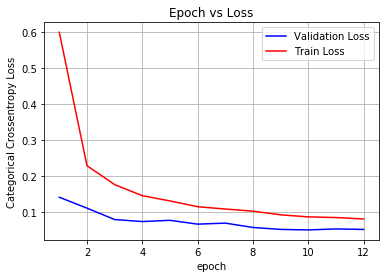

In [0]:
score = model.evaluate(X_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_title('Epoch vs Loss')
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)



### WITHOUT BN

In [0]:
model=Sequential()
#Adding first layer
model.add(Conv2D(64, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(1, 1)))

#Second layer
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(Dropout(0.20))
model.add(MaxPooling2D(pool_size=(2,2)))

#third layer
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(1,1)))

#Fourth Layer
model.add(Conv2D(32,kernel_size=(2,2),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#Fifth Layer
model.add(Conv2D(16,kernel_size=(2,2),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.20))


#Fully Connected layer
#Flattening
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

#Softmax
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 26, 26, 64)        0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 24, 24, 64)        36928     
_________________________________________________________________
dropout_13 (Dropout)         (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 10, 10, 32)        18464     
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 10, 10, 32)      

In [0]:
#Compiling with Cross-entropy-loss and Adam Optimizer taking Accuracy as a metric
from keras.optimizers import Adam
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
history=model.fit(X_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 10s 159us/step - loss: 0.7369 - acc: 0.7520 - val_loss: 0.2068 - val_acc: 0.9434
Epoch 2/12
60000/60000 [==============================] - 7s 122us/step - loss: 0.3211 - acc: 0.9007 - val_loss: 0.1479 - val_acc: 0.9586
Epoch 3/12
60000/60000 [==============================] - 7s 121us/step - loss: 0.2396 - acc: 0.9259 - val_loss: 0.1113 - val_acc: 0.9684
Epoch 4/12
60000/60000 [==============================] - 7s 121us/step - loss: 0.2066 - acc: 0.9379 - val_loss: 0.1184 - val_acc: 0.9664
Epoch 5/12
60000/60000 [==============================] - 7s 122us/step - loss: 0.1791 - acc: 0.9450 - val_loss: 0.0966 - val_acc: 0.9745
Epoch 6/12
60000/60000 [==============================] - 7s 121us/step - loss: 0.1571 - acc: 0.9525 - val_loss: 0.0849 - val_acc: 0.9769
Epoch 7/12
60000/60000 [==============================] - 7s 122us/step - loss: 0.1442 - acc: 0.9563 - val_loss: 0.0780 -

In [0]:
import matplotlib.pyplot as plt
import numpy as np

def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

Test score: 0.06042629976607859
Test accuracy: 0.9832


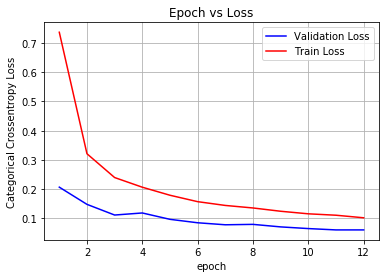

In [0]:
score = model.evaluate(X_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_title('Epoch vs Loss')
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

### WITHOUT DROPOUT

In [0]:
model=Sequential()
#Adding first layer
model.add(Conv2D(64, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(1, 1)))

#Second layer
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#third layer
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization(axis=1))
model.add(MaxPooling2D(pool_size=(1,1)))

#Fourth Layer
model.add(Conv2D(32,kernel_size=(2,2),activation='relu'))
model.add(BatchNormalization(axis=1))
model.add(MaxPooling2D(pool_size=(2,2)))

#Fifth Layer
model.add(Conv2D(16,kernel_size=(2,2),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


#Fully Connected layer
#Flattening
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))

#Softmax
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_47 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 26, 26, 64)        0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 24, 24, 64)        36928     
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 10, 10, 32)        18464     
_________________________________________________________________
batch_normalization_10 (Batc (None, 10, 10, 32)        40        
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 10, 10, 32)      

In [0]:
#Compiling with Cross-entropy-loss and Adam Optimizer taking Accuracy as a metric
from keras.optimizers import Adam
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
history=model.fit(X_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 9s 155us/step - loss: 0.2806 - acc: 0.9127 - val_loss: 0.0900 - val_acc: 0.9721
Epoch 2/12
60000/60000 [==============================] - 7s 115us/step - loss: 0.0881 - acc: 0.9727 - val_loss: 0.0809 - val_acc: 0.9754
Epoch 3/12
60000/60000 [==============================] - 7s 116us/step - loss: 0.0641 - acc: 0.9799 - val_loss: 0.0663 - val_acc: 0.9813
Epoch 4/12
60000/60000 [==============================] - 7s 115us/step - loss: 0.0526 - acc: 0.9835 - val_loss: 0.0566 - val_acc: 0.9831
Epoch 5/12
60000/60000 [==============================] - 7s 115us/step - loss: 0.0445 - acc: 0.9860 - val_loss: 0.0542 - val_acc: 0.9848
Epoch 6/12
60000/60000 [==============================] - 7s 115us/step - loss: 0.0403 - acc: 0.9865 - val_loss: 0.0511 - val_acc: 0.9858
Epoch 7/12
60000/60000 [==============================] - 7s 116us/step - loss: 0.0336 - acc: 0.9887 - val_loss: 0.0632 - 

In [0]:
import matplotlib.pyplot as plt
import numpy as np

def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

Test score: 0.04732237683171697
Test accuracy: 0.9867


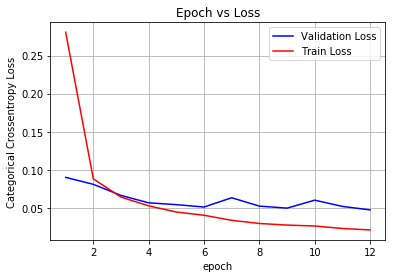

In [0]:
score = model.evaluate(X_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_title('Epoch vs Loss')
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

### CNN WITH 5 LAYERS AS SIGMOID ACTIVATION FUNCTION

### USING BN+DROPOUT

In [0]:
model=Sequential()
#Adding first layer
model.add(Conv2D(64, kernel_size=(3, 3),activation='sigmoid',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(1, 1)))

#Second layer
model.add(Conv2D(64, kernel_size=(3, 3), activation='sigmoid'))
model.add(Dropout(0.20))
model.add(MaxPooling2D(pool_size=(2,2)))

#third layer
model.add(Conv2D(32, kernel_size=(3, 3), activation='sigmoid'))
model.add(BatchNormalization(axis=1))
model.add(MaxPooling2D(pool_size=(1,1)))

#Fourth Layer
model.add(Conv2D(32,kernel_size=(2,2),activation='sigmoid'))
model.add(BatchNormalization(axis=1))
model.add(MaxPooling2D(pool_size=(2,2)))

#Fifth Layer
model.add(Conv2D(16,kernel_size=(2,2),activation='sigmoid'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.20))


#Fully Connected layer
#Flattening
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('sigmoid'))
model.add(Dropout(0.5))

#Softmax
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_52 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 26, 26, 64)        0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 24, 24, 64)        36928     
_________________________________________________________________
dropout_16 (Dropout)         (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_53 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 10, 10, 32)        18464     
_________________________________________________________________
batch_normalization_12 (Batc (None, 10, 10, 32)      

In [0]:
#Compiling with Cross-entropy-loss and Adam Optimizer taking Accuracy as a metric
from keras.optimizers import Adam
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
history=model.fit(X_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 10s 173us/step - loss: 2.4012 - acc: 0.1036 - val_loss: 2.3044 - val_acc: 0.1028
Epoch 2/12
60000/60000 [==============================] - 8s 129us/step - loss: 2.3268 - acc: 0.0999 - val_loss: 2.3069 - val_acc: 0.0958
Epoch 3/12
60000/60000 [==============================] - 8s 129us/step - loss: 2.3136 - acc: 0.1036 - val_loss: 2.3033 - val_acc: 0.1028
Epoch 4/12
60000/60000 [==============================] - 8s 128us/step - loss: 2.3084 - acc: 0.1033 - val_loss: 2.3023 - val_acc: 0.1135
Epoch 5/12
60000/60000 [==============================] - 8s 128us/step - loss: 2.3069 - acc: 0.1063 - val_loss: 2.3018 - val_acc: 0.1135
Epoch 6/12
60000/60000 [==============================] - 8s 128us/step - loss: 2.3056 - acc: 0.1060 - val_loss: 2.3018 - val_acc: 0.1135
Epoch 7/12
60000/60000 [==============================] - 8s 128us/step - loss: 2.3051 - acc: 0.1051 - val_loss: 2.3026 -

In [0]:
import matplotlib.pyplot as plt
import numpy as np

def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

Test score: 0.03929063466354273
Test accuracy: 0.9873


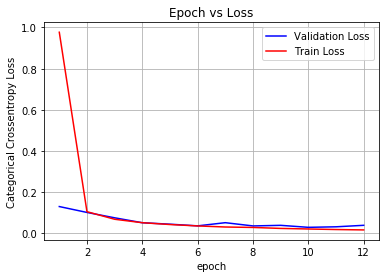

In [0]:
score = model.evaluate(X_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_title('Epoch vs Loss')
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

### WITHOUT BN

In [0]:
model=Sequential()
#Adding first layer
model.add(Conv2D(64, kernel_size=(3, 3),activation='sigmoid',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(1, 1)))

#Second layer
model.add(Conv2D(64, kernel_size=(3, 3), activation='sigmoid'))
model.add(Dropout(0.20))
model.add(MaxPooling2D(pool_size=(2,2)))

#third layer
model.add(Conv2D(32, kernel_size=(3, 3), activation='sigmoid'))
model.add(MaxPooling2D(pool_size=(1,1)))

#Fourth Layer
model.add(Conv2D(32,kernel_size=(2,2),activation='sigmoid'))
model.add(MaxPooling2D(pool_size=(2,2)))

#Fifth Layer
model.add(Conv2D(16,kernel_size=(2,2),activation='sigmoid'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.20))


#Fully Connected layer
#Flattening
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('sigmoid'))
model.add(Dropout(0.5))

#Softmax
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_57 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_57 (MaxPooling (None, 26, 26, 64)        0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 24, 24, 64)        36928     
_________________________________________________________________
dropout_19 (Dropout)         (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_58 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 10, 10, 32)        18464     
_________________________________________________________________
max_pooling2d_59 (MaxPooling (None, 10, 10, 32)      

In [0]:
#Compiling with Cross-entropy-loss and Adam Optimizer taking Accuracy as a metric
from keras.optimizers import Adam
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
history=model.fit(X_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 10s 170us/step - loss: 2.4015 - acc: 0.1020 - val_loss: 2.3055 - val_acc: 0.1032
Epoch 2/12
60000/60000 [==============================] - 8s 126us/step - loss: 2.3254 - acc: 0.1023 - val_loss: 2.3061 - val_acc: 0.1028
Epoch 3/12
60000/60000 [==============================] - 7s 122us/step - loss: 2.3138 - acc: 0.1026 - val_loss: 2.3021 - val_acc: 0.1028
Epoch 4/12
60000/60000 [==============================] - 7s 125us/step - loss: 2.3090 - acc: 0.1046 - val_loss: 2.3033 - val_acc: 0.1009
Epoch 5/12
60000/60000 [==============================] - 7s 125us/step - loss: 2.3065 - acc: 0.1036 - val_loss: 2.3024 - val_acc: 0.1135
Epoch 6/12
60000/60000 [==============================] - 7s 124us/step - loss: 2.3053 - acc: 0.1056 - val_loss: 2.3023 - val_acc: 0.1135
Epoch 7/12
60000/60000 [==============================] - 7s 124us/step - loss: 2.3049 - acc: 0.1057 - val_loss: 2.3016 -

In [0]:
import matplotlib.pyplot as plt
import numpy as np

def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

Test score: 0.03929063466354273
Test accuracy: 0.9873


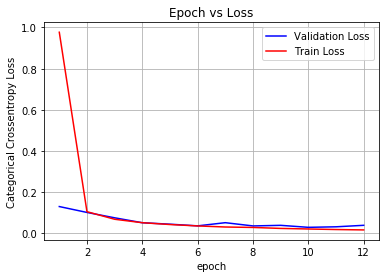

In [0]:
score = model.evaluate(X_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_title('Epoch vs Loss')
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

### WITHOUT DROPOUT

In [0]:
model=Sequential()
#Adding first layer
model.add(Conv2D(64, kernel_size=(3, 3),activation='sigmoid',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(1, 1)))

#Second layer
model.add(Conv2D(64, kernel_size=(3, 3), activation='sigmoid'))
model.add(MaxPooling2D(pool_size=(2,2)))

#third layer
model.add(Conv2D(32, kernel_size=(3, 3), activation='sigmoid'))
model.add(BatchNormalization(axis=1))
model.add(MaxPooling2D(pool_size=(1,1)))

#Fourth Layer
model.add(Conv2D(32,kernel_size=(2,2),activation='sigmoid'))
model.add(BatchNormalization(axis=1))
model.add(MaxPooling2D(pool_size=(2,2)))

#Fifth Layer
model.add(Conv2D(16,kernel_size=(2,2),activation='sigmoid'))
model.add(MaxPooling2D(pool_size=(2,2)))


#Fully Connected layer
#Flattening
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('sigmoid'))

#Softmax
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_62 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_62 (MaxPooling (None, 26, 26, 64)        0         
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 24, 24, 64)        36928     
_________________________________________________________________
max_pooling2d_63 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 10, 10, 32)        18464     
_________________________________________________________________
batch_normalization_14 (Batc (None, 10, 10, 32)        40        
_________________________________________________________________
max_pooling2d_64 (MaxPooling (None, 10, 10, 32)      

In [0]:
#Compiling with Cross-entropy-loss and Adam Optimizer taking Accuracy as a metric
from keras.optimizers import Adam
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
history=model.fit(X_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 10s 161us/step - loss: 2.1318 - acc: 0.2149 - val_loss: 1.2405 - val_acc: 0.6568
Epoch 2/12
60000/60000 [==============================] - 7s 111us/step - loss: 0.3614 - acc: 0.9150 - val_loss: 0.2074 - val_acc: 0.9415
Epoch 3/12
60000/60000 [==============================] - 7s 112us/step - loss: 0.1606 - acc: 0.9553 - val_loss: 0.1580 - val_acc: 0.9537
Epoch 4/12
60000/60000 [==============================] - 7s 112us/step - loss: 0.1218 - acc: 0.9644 - val_loss: 0.1252 - val_acc: 0.9613
Epoch 5/12
60000/60000 [==============================] - 7s 113us/step - loss: 0.1055 - acc: 0.9693 - val_loss: 0.1071 - val_acc: 0.9662
Epoch 6/12
60000/60000 [==============================] - 7s 114us/step - loss: 0.0901 - acc: 0.9735 - val_loss: 0.1035 - val_acc: 0.9685
Epoch 7/12
60000/60000 [==============================] - 7s 112us/step - loss: 0.0819 - acc: 0.9754 - val_loss: 0.0876 -

In [0]:
import matplotlib.pyplot as plt
import numpy as np

def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

Test score: 0.07189704030742869
Test accuracy: 0.9779


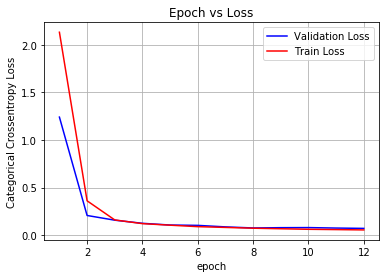

In [0]:
score = model.evaluate(X_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_title('Epoch vs Loss')
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

### CNN WITH 6 LAYERS ASA RELU ACTIVATION FUNCTION

### BN+ DROPOUT

In [0]:
model=Sequential()
#Adding first layer
model.add(Conv2D(64, kernel_size=(5, 5),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(1, 1)))

#Adding Second Layer
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization(axis=1))
model.add(MaxPooling2D(pool_size=(2,2)))

#Adding Third Layer
model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=(1,1)))

#Fourth layer
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(1,1)))

#Fifth layer
model.add(Conv2D(16, kernel_size=(2, 2), activation='relu'))
model.add(BatchNormalization(axis=1))
model.add(MaxPooling2D(pool_size=(1,1)))

#Sixth Layer
model.add(Conv2D(16,kernel_size=(2,2),activation='relu'))
model.add(BatchNormalization(axis=1))
model.add(MaxPooling2D(pool_size=(1,1)))



#Fully Connected layer
#Flattening
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))

#Softmax
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_67 (Conv2D)           (None, 24, 24, 64)        1664      
_________________________________________________________________
max_pooling2d_67 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 22, 22, 64)        36928     
_________________________________________________________________
batch_normalization_16 (Batc (None, 22, 22, 64)        88        
_________________________________________________________________
max_pooling2d_68 (MaxPooling (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 9, 9, 32)          18464     
_________________________________________________________________
dropout_22 (Dropout)         (None, 9, 9, 32)        

In [0]:
#Compiling with Cross-entropy-loss and Adam Optimizer taking Accuracy as a metric
from keras.optimizers import Adam
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
history=model.fit(X_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 11s 187us/step - loss: 0.4371 - acc: 0.8586 - val_loss: 0.0679 - val_acc: 0.9780
Epoch 2/12
60000/60000 [==============================] - 8s 126us/step - loss: 0.1180 - acc: 0.9648 - val_loss: 0.0482 - val_acc: 0.9842
Epoch 3/12
60000/60000 [==============================] - 8s 125us/step - loss: 0.0846 - acc: 0.9754 - val_loss: 0.0401 - val_acc: 0.9874
Epoch 4/12
60000/60000 [==============================] - 8s 126us/step - loss: 0.0733 - acc: 0.9791 - val_loss: 0.0354 - val_acc: 0.9898
Epoch 5/12
60000/60000 [==============================] - 8s 125us/step - loss: 0.0636 - acc: 0.9815 - val_loss: 0.0306 - val_acc: 0.9908
Epoch 6/12
60000/60000 [==============================] - 8s 126us/step - loss: 0.0569 - acc: 0.9835 - val_loss: 0.0329 - val_acc: 0.9898
Epoch 7/12
60000/60000 [==============================] - 8s 126us/step - loss: 0.0517 - acc: 0.9850 - val_loss: 0.0292 -

In [0]:
import matplotlib.pyplot as plt
import numpy as np

def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

Test score: 0.02512707673313598
Test accuracy: 0.9928


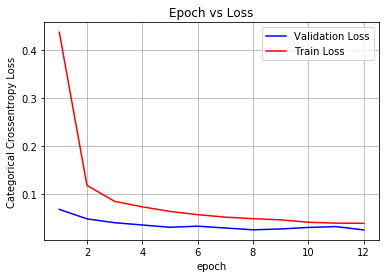

In [0]:
score = model.evaluate(X_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_title('Epoch vs Loss')
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)


### WITHOUT BN

In [0]:
model=Sequential()
#Adding first layer
model.add(Conv2D(64, kernel_size=(5, 5),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(1, 1)))

#Adding Second Layer
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#Adding Third Layer
model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=(1,1)))

#Fourth layer
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(1,1)))

#Fifth layer
model.add(Conv2D(16, kernel_size=(2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(1,1)))

#Sixth Layer
model.add(Conv2D(16,kernel_size=(2,2),activation='relu'))
model.add(MaxPooling2D(pool_size=(1,1)))



#Fully Connected layer
#Flattening
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))

#Softmax
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_73 (Conv2D)           (None, 24, 24, 64)        1664      
_________________________________________________________________
max_pooling2d_73 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 22, 22, 64)        36928     
_________________________________________________________________
max_pooling2d_74 (MaxPooling (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_75 (Conv2D)           (None, 9, 9, 32)          18464     
_________________________________________________________________
dropout_25 (Dropout)         (None, 9, 9, 32)          0         
_________________________________________________________________
max_pooling2d_75 (MaxPooling (None, 9, 9, 32)        

In [0]:
#Compiling with Cross-entropy-loss and Adam Optimizer taking Accuracy as a metric
from keras.optimizers import Adam
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
history=model.fit(X_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 10s 163us/step - loss: 0.4735 - acc: 0.8461 - val_loss: 0.0686 - val_acc: 0.9783
Epoch 2/12
60000/60000 [==============================] - 6s 101us/step - loss: 0.1209 - acc: 0.9649 - val_loss: 0.0562 - val_acc: 0.9824
Epoch 3/12
60000/60000 [==============================] - 6s 102us/step - loss: 0.0902 - acc: 0.9741 - val_loss: 0.0354 - val_acc: 0.9882
Epoch 4/12
60000/60000 [==============================] - 6s 102us/step - loss: 0.0776 - acc: 0.9775 - val_loss: 0.0365 - val_acc: 0.9887
Epoch 5/12
60000/60000 [==============================] - 6s 102us/step - loss: 0.0682 - acc: 0.9804 - val_loss: 0.0372 - val_acc: 0.9887
Epoch 6/12
60000/60000 [==============================] - 6s 102us/step - loss: 0.0606 - acc: 0.9826 - val_loss: 0.0269 - val_acc: 0.9913
Epoch 7/12
60000/60000 [==============================] - 6s 103us/step - loss: 0.0560 - acc: 0.9841 - val_loss: 0.0228 -

In [0]:
import matplotlib.pyplot as plt
import numpy as np

def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

Test score: 0.023400390856726152
Test accuracy: 0.993


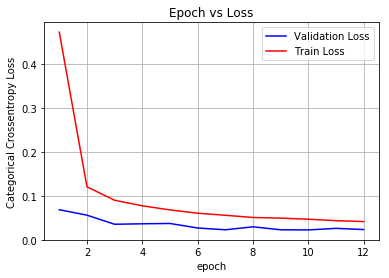

In [0]:
score = model.evaluate(X_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_title('Epoch vs Loss')
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

### WITHOUT DROPOUT

In [0]:
model=Sequential()
#Adding first layer
model.add(Conv2D(64, kernel_size=(5, 5),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(1, 1)))

#Adding Second Layer
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization(axis=1))
model.add(MaxPooling2D(pool_size=(2,2)))

#Adding Third Layer
model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(1,1)))

#Fourth layer
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(1,1)))

#Fifth layer
model.add(Conv2D(16, kernel_size=(2, 2), activation='relu'))
model.add(BatchNormalization(axis=1))
model.add(MaxPooling2D(pool_size=(1,1)))

#Sixth Layer
model.add(Conv2D(16,kernel_size=(2,2),activation='relu'))
model.add(BatchNormalization(axis=1))
model.add(MaxPooling2D(pool_size=(1,1)))



#Fully Connected layer
#Flattening
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))

#Softmax
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_79 (Conv2D)           (None, 24, 24, 64)        1664      
_________________________________________________________________
max_pooling2d_79 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_80 (Conv2D)           (None, 22, 22, 64)        36928     
_________________________________________________________________
batch_normalization_19 (Batc (None, 22, 22, 64)        88        
_________________________________________________________________
max_pooling2d_80 (MaxPooling (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_81 (Conv2D)           (None, 9, 9, 32)          18464     
_________________________________________________________________
max_pooling2d_81 (MaxPooling (None, 9, 9, 32)        

In [0]:
#Compiling with Cross-entropy-loss and Adam Optimizer taking Accuracy as a metric
from keras.optimizers import Adam
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
history=model.fit(X_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 11s 190us/step - loss: 0.1640 - acc: 0.9496 - val_loss: 0.0522 - val_acc: 0.9842
Epoch 2/12
60000/60000 [==============================] - 7s 122us/step - loss: 0.0480 - acc: 0.9852 - val_loss: 0.0370 - val_acc: 0.9874
Epoch 3/12
60000/60000 [==============================] - 7s 122us/step - loss: 0.0364 - acc: 0.9884 - val_loss: 0.0359 - val_acc: 0.9885
Epoch 4/12
60000/60000 [==============================] - 7s 122us/step - loss: 0.0263 - acc: 0.9915 - val_loss: 0.0320 - val_acc: 0.9901
Epoch 5/12
60000/60000 [==============================] - 7s 121us/step - loss: 0.0229 - acc: 0.9923 - val_loss: 0.0337 - val_acc: 0.9897
Epoch 6/12
60000/60000 [==============================] - 7s 123us/step - loss: 0.0186 - acc: 0.9938 - val_loss: 0.0362 - val_acc: 0.9897
Epoch 7/12
60000/60000 [==============================] - 7s 122us/step - loss: 0.0176 - acc: 0.9941 - val_loss: 0.0360 -

In [0]:
import matplotlib.pyplot as plt
import numpy as np

def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

Test score: 0.038047944817450934
Test accuracy: 0.9888


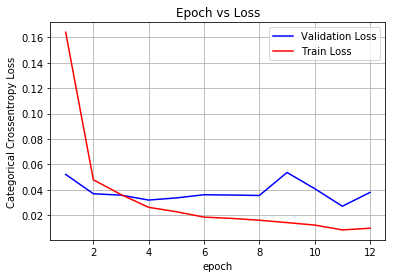

In [0]:
score = model.evaluate(X_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_title('Epoch vs Loss')
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

### CNN WITH 6 LAYERS AS A SIGMOID ACTIVATION FUNCTION

### BN+DROPOUT

In [0]:
model=Sequential()
#Adding first layer
model.add(Conv2D(64, kernel_size=(5, 5),activation='sigmoid',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(1, 1)))

#Adding Second Layer
model.add(Conv2D(64,kernel_size=(3,3),activation='sigmoid'))
model.add(BatchNormalization(axis=1))
model.add(MaxPooling2D(pool_size=(2,2)))

#Adding Third Layer
model.add(Conv2D(32,kernel_size=(3,3),activation='sigmoid'))
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=(1,1)))

#Fourth layer
model.add(Conv2D(32, kernel_size=(3, 3), activation='sigmoid'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(1,1)))

#Fifth layer
model.add(Conv2D(16, kernel_size=(2, 2), activation='sigmoid'))
model.add(BatchNormalization(axis=1))
model.add(MaxPooling2D(pool_size=(1,1)))

#Sixth Layer
model.add(Conv2D(16,kernel_size=(2,2),activation='sigmoid'))
model.add(BatchNormalization(axis=1))
model.add(MaxPooling2D(pool_size=(1,1)))



#Fully Connected layer
#Flattening
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('sigmoid'))
model.add(Dropout(0.5))

#Softmax
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_85 (Conv2D)           (None, 24, 24, 64)        1664      
_________________________________________________________________
max_pooling2d_85 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_86 (Conv2D)           (None, 22, 22, 64)        36928     
_________________________________________________________________
batch_normalization_22 (Batc (None, 22, 22, 64)        88        
_________________________________________________________________
max_pooling2d_86 (MaxPooling (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_87 (Conv2D)           (None, 9, 9, 32)          18464     
_________________________________________________________________
dropout_28 (Dropout)         (None, 9, 9, 32)        

In [0]:
#Compiling with Cross-entropy-loss and Adam Optimizer taking Accuracy as a metric
from keras.optimizers import Adam
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
history=model.fit(X_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 12s 202us/step - loss: 2.3139 - acc: 0.1067 - val_loss: 2.3014 - val_acc: 0.1135
Epoch 2/12
60000/60000 [==============================] - 8s 130us/step - loss: 2.3016 - acc: 0.1123 - val_loss: 2.3010 - val_acc: 0.1135
Epoch 3/12
60000/60000 [==============================] - 8s 130us/step - loss: 1.0131 - acc: 0.6374 - val_loss: 0.1495 - val_acc: 0.9534
Epoch 4/12
60000/60000 [==============================] - 8s 133us/step - loss: 0.1797 - acc: 0.9486 - val_loss: 0.0766 - val_acc: 0.9760
Epoch 5/12
60000/60000 [==============================] - 8s 129us/step - loss: 0.1295 - acc: 0.9628 - val_loss: 0.0598 - val_acc: 0.9822
Epoch 6/12
60000/60000 [==============================] - 8s 127us/step - loss: 0.1069 - acc: 0.9695 - val_loss: 0.0509 - val_acc: 0.9846
Epoch 7/12
60000/60000 [==============================] - 8s 127us/step - loss: 0.0941 - acc: 0.9728 - val_loss: 0.0509 -

In [0]:
import matplotlib.pyplot as plt
import numpy as np

def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

Test score: 0.03795005509173498
Test accuracy: 0.9876


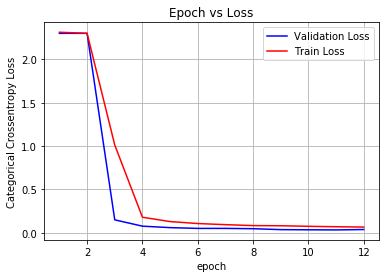

In [0]:
score = model.evaluate(X_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_title('Epoch vs Loss')
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

### WITHOUT BN

In [0]:
model=Sequential()
#Adding first layer
model.add(Conv2D(64, kernel_size=(5, 5),activation='sigmoid',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(1, 1)))

#Adding Second Layer
model.add(Conv2D(64,kernel_size=(3,3),activation='sigmoid'))
model.add(MaxPooling2D(pool_size=(2,2)))

#Adding Third Layer
model.add(Conv2D(32,kernel_size=(3,3),activation='sigmoid'))
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=(1,1)))

#Fourth layer
model.add(Conv2D(32, kernel_size=(3, 3), activation='sigmoid'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(1,1)))

#Fifth layer
model.add(Conv2D(16, kernel_size=(2, 2), activation='sigmoid'))
model.add(MaxPooling2D(pool_size=(1,1)))

#Sixth Layer
model.add(Conv2D(16,kernel_size=(2,2),activation='sigmoid'))
model.add(MaxPooling2D(pool_size=(1,1)))



#Fully Connected layer
#Flattening
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('sigmoid'))
model.add(Dropout(0.5))

#Softmax
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_91 (Conv2D)           (None, 24, 24, 64)        1664      
_________________________________________________________________
max_pooling2d_91 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_92 (Conv2D)           (None, 22, 22, 64)        36928     
_________________________________________________________________
max_pooling2d_92 (MaxPooling (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_93 (Conv2D)           (None, 9, 9, 32)          18464     
_________________________________________________________________
dropout_31 (Dropout)         (None, 9, 9, 32)          0         
_________________________________________________________________
max_pooling2d_93 (MaxPooling (None, 9, 9, 32)        

In [0]:
#Compiling with Cross-entropy-loss and Adam Optimizer taking Accuracy as a metric
from keras.optimizers import Adam
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
history=model.fit(X_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 11s 176us/step - loss: 2.3127 - acc: 0.1093 - val_loss: 2.3013 - val_acc: 0.1135
Epoch 2/12
60000/60000 [==============================] - 6s 102us/step - loss: 2.3015 - acc: 0.1122 - val_loss: 2.3011 - val_acc: 0.1135
Epoch 3/12
60000/60000 [==============================] - 6s 102us/step - loss: 2.3013 - acc: 0.1124 - val_loss: 2.3011 - val_acc: 0.1135
Epoch 4/12
60000/60000 [==============================] - 6s 103us/step - loss: 2.3013 - acc: 0.1123 - val_loss: 2.3011 - val_acc: 0.1135
Epoch 5/12
60000/60000 [==============================] - 6s 103us/step - loss: 2.3013 - acc: 0.1124 - val_loss: 2.3010 - val_acc: 0.1135
Epoch 6/12
60000/60000 [==============================] - 6s 102us/step - loss: 2.3013 - acc: 0.1124 - val_loss: 2.3010 - val_acc: 0.1135
Epoch 7/12
60000/60000 [==============================] - 6s 104us/step - loss: 2.3013 - acc: 0.1124 - val_loss: 2.3011 -

In [0]:
import matplotlib.pyplot as plt
import numpy as np

def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

Test score: 0.03929063466354273
Test accuracy: 0.9873


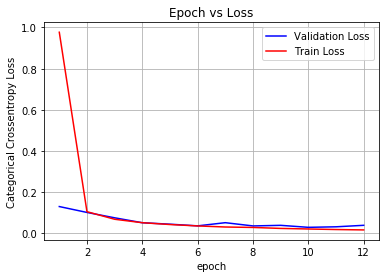

In [0]:
score = model.evaluate(X_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_title('Epoch vs Loss')
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

### WITHOUT DROPOUT

In [0]:
model=Sequential()
#Adding first layer
model.add(Conv2D(64, kernel_size=(5, 5),activation='sigmoid',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(1, 1)))

#Adding Second Layer
model.add(Conv2D(64,kernel_size=(3,3),activation='sigmoid'))
model.add(BatchNormalization(axis=1))
model.add(MaxPooling2D(pool_size=(2,2)))

#Adding Third Layer
model.add(Conv2D(32,kernel_size=(3,3),activation='sigmoid'))
model.add(MaxPooling2D(pool_size=(1,1)))

#Fourth layer
model.add(Conv2D(32, kernel_size=(3, 3), activation='sigmoid'))
model.add(MaxPooling2D(pool_size=(1,1)))

#Fifth layer
model.add(Conv2D(16, kernel_size=(2, 2), activation='sigmoid'))
model.add(BatchNormalization(axis=1))
model.add(MaxPooling2D(pool_size=(1,1)))

#Sixth Layer
model.add(Conv2D(16,kernel_size=(2,2),activation='sigmoid'))
model.add(BatchNormalization(axis=1))
model.add(MaxPooling2D(pool_size=(1,1)))



#Fully Connected layer
#Flattening
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('sigmoid'))

#Softmax
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_97 (Conv2D)           (None, 24, 24, 64)        1664      
_________________________________________________________________
max_pooling2d_97 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_98 (Conv2D)           (None, 22, 22, 64)        36928     
_________________________________________________________________
batch_normalization_25 (Batc (None, 22, 22, 64)        88        
_________________________________________________________________
max_pooling2d_98 (MaxPooling (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_99 (Conv2D)           (None, 9, 9, 32)          18464     
_________________________________________________________________
max_pooling2d_99 (MaxPooling (None, 9, 9, 32)        

In [0]:
#Compiling with Cross-entropy-loss and Adam Optimizer taking Accuracy as a metric
from keras.optimizers import Adam
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
history=model.fit(X_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 13s 221us/step - loss: 0.9769 - acc: 0.6535 - val_loss: 0.1304 - val_acc: 0.9664
Epoch 2/12
60000/60000 [==============================] - 7s 125us/step - loss: 0.1054 - acc: 0.9695 - val_loss: 0.1018 - val_acc: 0.9700
Epoch 3/12
60000/60000 [==============================] - 8s 125us/step - loss: 0.0687 - acc: 0.9803 - val_loss: 0.0758 - val_acc: 0.9770
Epoch 4/12
60000/60000 [==============================] - 8s 126us/step - loss: 0.0519 - acc: 0.9853 - val_loss: 0.0518 - val_acc: 0.9839
Epoch 5/12
60000/60000 [==============================] - 8s 126us/step - loss: 0.0431 - acc: 0.9874 - val_loss: 0.0447 - val_acc: 0.9855
Epoch 6/12
60000/60000 [==============================] - 8s 126us/step - loss: 0.0363 - acc: 0.9895 - val_loss: 0.0366 - val_acc: 0.9889
Epoch 7/12
60000/60000 [==============================] - 8s 125us/step - loss: 0.0310 - acc: 0.9906 - val_loss: 0.0520 -

In [0]:
import matplotlib.pyplot as plt
import numpy as np

def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

Test score: 0.03929063466354273
Test accuracy: 0.9873


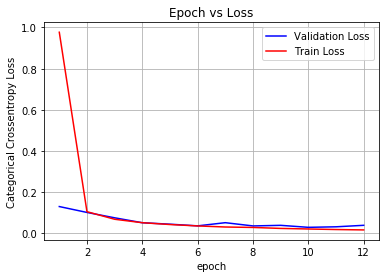

In [0]:
score = model.evaluate(X_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_title('Epoch vs Loss')
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [0]:
from prettytable import PrettyTable    
x = PrettyTable()
x.field_names = ["No of layer","With/Without Dropout/BN","activation function", "Accuracy %"]


x.add_row(["3", "BN+DROPOUT"   , "RELU"     ,"98.6"])
x.add_row(["3", "DROPOUT"   , "RELU"     ,"98.47"])
x.add_row(["3", "BN"   , "RELU"     ,"98.48"])

x.add_row(["3", "BN+DROPOUT"   , "SIGMOID"     ,"98.53"])
x.add_row(["3", "DROPOUT"   , "SIGMOID"     ,"97.79"])
x.add_row(["3", "BN"   , "SIGMOID"     ,"97.88"])



x.add_row(["5", "BN+DROPOUT"   , "RELU"     ,"98.52"])
x.add_row(["5", "DROPOUT"   , "RELU"     ,"98.32"])
x.add_row(["5", "BN"   , "RELU"     ,"98.67"])

x.add_row(["5", "BN+DROPOUT"   , "SIGMOID"     ,"98.73"])
x.add_row(["5", "DROPOUT"   , "SIGMOID"     ,"97.73"])
x.add_row(["5", "BN"   , "SIGMOID"     ,"97.79"])



x.add_row(["6", "BN+DROPOUT"   , "RELU"     ,"99.28"])
x.add_row(["6", "DROPOUT"   , "RELU"     ,"99.3"])
x.add_row(["6", "BN"   , "RELU"     ,"98.88"])

x.add_row(["6", "BN+DROPOUT"   , "SIGMOID"     ,"98.76"])
x.add_row(["6", "DROPOUT"   , "SIGMOID"     ,"98.73"])
x.add_row(["6", "BN"   , "SIGMOID"     ,"98.73"])




print(x)

+-------------+-------------------------+---------------------+------------+
| No of layer | With/Without Dropout/BN | activation function | Accuracy % |
+-------------+-------------------------+---------------------+------------+
|      3      |        BN+DROPOUT       |         RELU        |    98.6    |
|      3      |         DROPOUT         |         RELU        |   98.47    |
|      3      |            BN           |         RELU        |   98.48    |
|      3      |        BN+DROPOUT       |       SIGMOID       |   98.53    |
|      3      |         DROPOUT         |       SIGMOID       |   97.79    |
|      3      |            BN           |       SIGMOID       |   97.88    |
|      5      |        BN+DROPOUT       |         RELU        |   98.52    |
|      5      |         DROPOUT         |         RELU        |   98.32    |
|      5      |            BN           |         RELU        |   98.67    |
|      5      |        BN+DROPOUT       |       SIGMOID       |   98.73    |

FROM ABOVE WE CAN CONCLUDE THAT RELU ACTIVATION FUNCTION  WORKS BETTER THAN SIGMOID.

IN THIS ASSIGNMENT WE HAVE USED DIFFERENT ACTIVATION FUNCTION,NO OF LAYERS TO COMAPRE OUR PERFORMANCE.

Batch Normalization works more better than dropout for Relu Activation Function.

AS LAYERS INCREASE PERFORMANCE ALSO INCREASES.